# Entities involved in reconstructing occupied Mariupol

In the aftermath of the devastating bombing in Mariupol, our investigation delved into the intricate web of construction sites engaged in the city's reconstruction. Focusing on a few of the companies spearheading these efforts, our report sheds light on their affiliations, unraveling the networks that play a  role in rebuilding Mariupol.

In [160]:
import pandas as pd

construction_sites = pd.read_excel("data/Mariupol_construction_sites.xlsx")

construction_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Coordinates                    97 non-null     object
 1   Borough                        105 non-null    object
 2   Address of Construction Site   103 non-null    object
 3   Company Name                   104 non-null    object
 4   New, Renovation or Demolition  85 non-null     object
 5   Type of Construction           97 non-null     object
 6   Connected Person               52 non-null     object
 7   Date                           97 non-null     object
 8   Links                          104 non-null    object
 9   Proof / Description            102 non-null    object
 10  Notes                          68 non-null     object
 11  Unnamed: 11                    2 non-null      object
dtypes: object(12)
memory usage: 10.0+ KB


### Data preparation

Clean the data by grouping cells that have multiple values into lists, and remove some weird characters. To create a time=based plot we will also add new columns 'Month' and 'Year' based on the 'Date' column.

In [161]:
construction_sites.replace({'"': '', '«': '', '»': ''}, regex=True, inplace=True)
construction_sites.replace(r'\n', '', regex=True, inplace=True)
construction_sites.drop(columns=["Unnamed: 11"], inplace=True)

# Process the date columns
construction_sites["Date"] = pd.to_datetime(construction_sites["Date"])
construction_sites["Period"] = pd.to_datetime(construction_sites["Date"]).dt.to_period("M")

# Split values based on `/` and strip whitespaces for each column
columns_to_process = ["Company Name", "Connected Person", "Proof / Description", "Notes"]

for col in columns_to_process:
    construction_sites[col] = construction_sites[col].str.split("/")

construction_sites = construction_sites.explode("Company Name")
construction_sites = construction_sites.explode("Connected Person")

construction_sites.head()

,Coordinates,Borough,Address of Construction Site,Company Name,"New, Renovation or Demolition",Type of Construction,Connected Person,Date,Links,Proof / Description,Notes,Period
0,"47.117412, 37.559069",Tsentralnyi borough,"Мариуполь, проспект Металургів 131",ООО ГБС,Renovation,Zoo,Ларионов Андрей Анатольевич,2023-02-02,https://dnr-news.ru/society/2023/02/03/227706....,NaN,[Mariupol Zoo],2023-02
1,"47.106186, 37.650810",Livoberezhnyi borough,"Маріуполь, проспект Перемоги 77",Курская область,Renovation,Multi Storey Residential Building,NaN,2023-12-05,https://dnr-news.ru/society/2022/12/05/176395....,"[DNR news article , Address on Google Maps - s...",[The DNR news article mentions that the Kursk ...,2023-12
2,"47.105806, 37.653361",Livoberezhnyi borough,"Маріуполь, проспект Перемоги 87",Курская область,Renovation,Residential Building,NaN,2022-12-05,https://www.google.com/maps/place/Peremohy+Ave...,"[DNR news article , Address on Google Maps - n...",NaN,2022-12
3,"47.106235, 37.650100",Livoberezhnyi borough,"Маріуполь, проспект Перемоги 75",Курская область,Renovation,Multi Storey Residential Building,NaN,2022-12-05,https://dnr-news.ru/society/2022/12/05/176395....,"[DNR news article , Address on Google Maps - s...",NaN,2022-12
4,"47.104468, 37.654781",Livoberezhnyi borough,"Маріуполь, вул. Московська 64",Курская область,Fake,Multi Storey Residential Building,NaN,2022-12-05,https://dnr-news.ru/society/2022/12/05/176395....,"[DNR news article , Address on Yandex Maps , A...",[FAKE - the before and after provided by DNR n...,2022-12


### Visualization

The graph illustrates the distribution of construction sites opened per month, categorized by the top 10 companies involved. Each bar represents a specific month and year combination, with the height of the bar indicating the number of construction sites opened during that period. The stacked bars further delineate the contribution of each company to the total number of construction sites opened in each month/year.

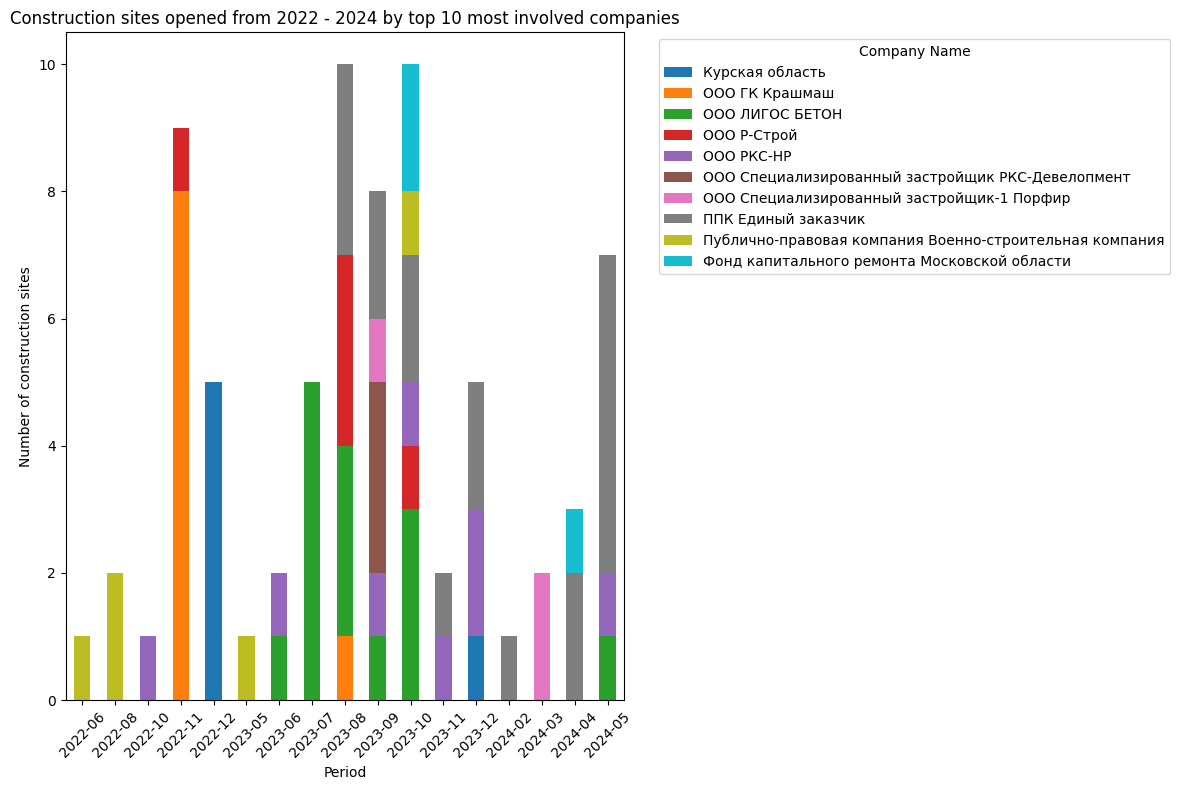

In [162]:
import matplotlib.pyplot as plt

# Find the top 10 most frequently occuring companies in the data
company_counts = construction_sites["Company Name"].value_counts()
top_10_companies = company_counts.head(10).index

df_top_10 = construction_sites[construction_sites["Company Name"].isin(top_10_companies)]

construction_sites_count = df_top_10.groupby(["Period", "Company Name"]).size().unstack(fill_value=0)

# Sort the companies by date to find out how many construction sites they erected per month
construction_sites_count_sorted = construction_sites_count.sort_index()

construction_sites_count_sorted.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Construction sites opened from 2022 - 2024 by top 10 most involved companies')
plt.xlabel('Period')
plt.ylabel('Number of construction sites')
plt.xticks(rotation=45)
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph displays the cumulative number of construction sites erected in Mariupol from 2022 to 2024.

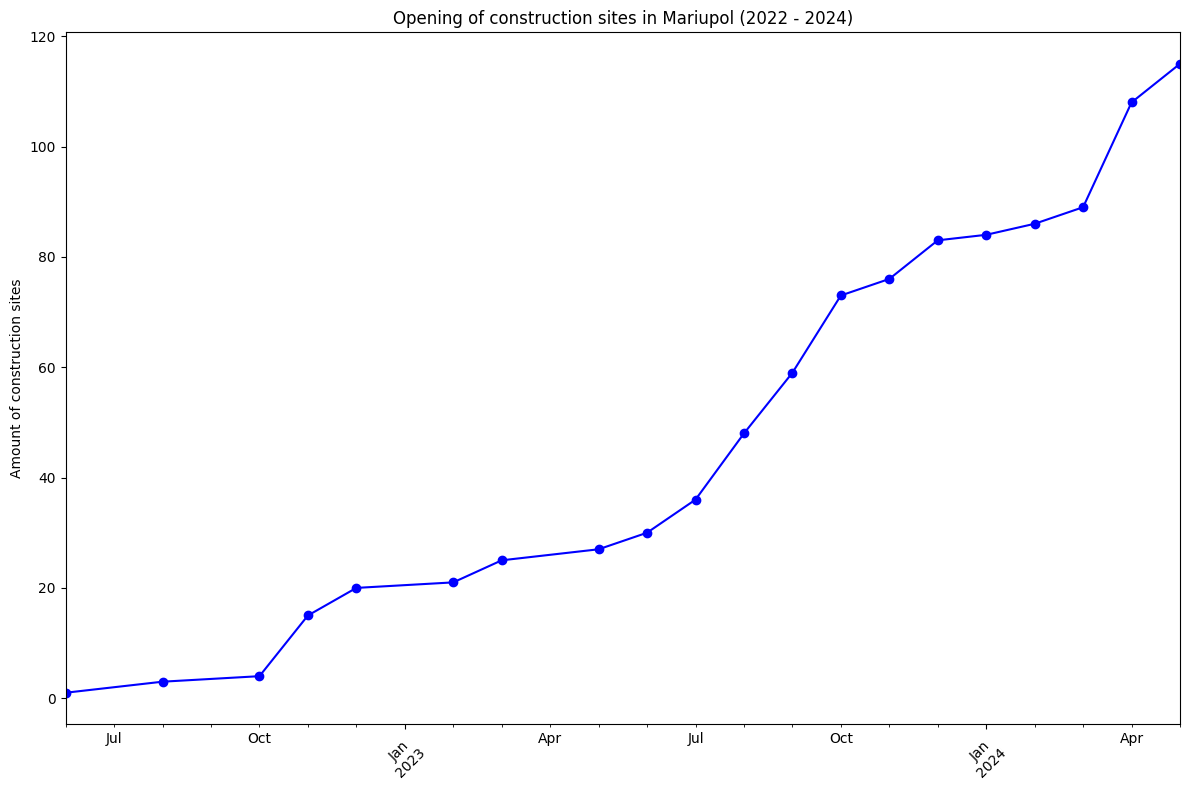

In [163]:
import matplotlib.pyplot as plt

datapoints_per_period = construction_sites.groupby("Period").size()

# Calculate the cumulative sum
cumulative_totals = datapoints_per_period.cumsum()

# Plot the line graph
cumulative_totals.plot(kind='line', figsize=(12, 8), marker='o', color='b')
plt.title('Opening of construction sites in Mariupol (2022 - 2024)')
plt.xlabel('')
plt.ylabel('Amount of construction sites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What kind of construction is being conducted and in which boroughs in Mariupol.

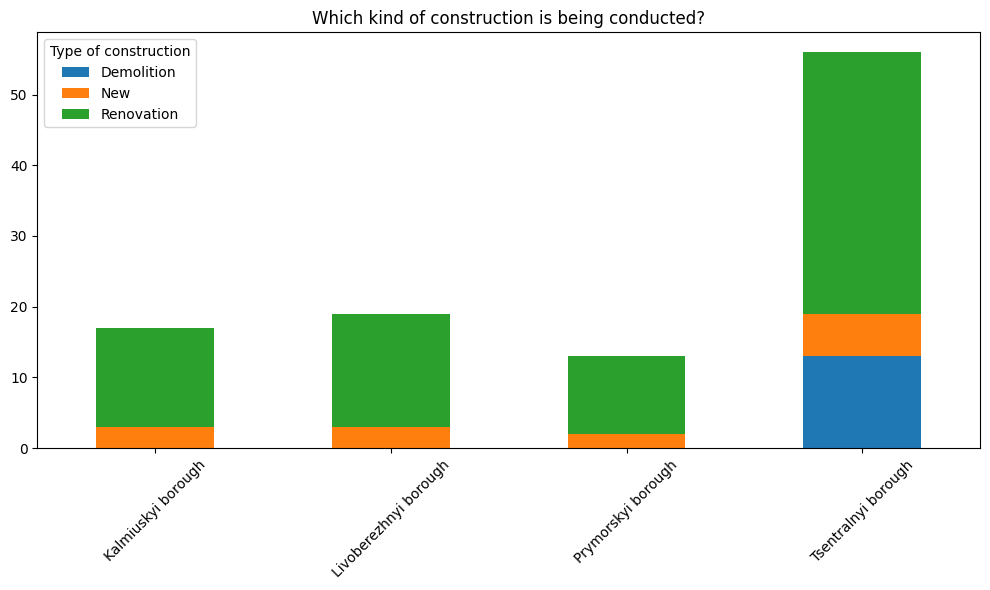

In [164]:
construction_sites = construction_sites[construction_sites["New, Renovation or Demolition"] != "Fake"]

construction_by_building = construction_sites.groupby(["Borough", "New, Renovation or Demolition"]).size().unstack(fill_value=0)

construction_by_building.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Which kind of construction is being conducted?")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.legend(title="Type of construction")
plt.tight_layout()
plt.show()